# <font color="purple">SNR Result</font>

In [1]:
!pip install -qq -e git+http://github.com/tensorflow/cleverhans.git#egg=cleverhans
import sys
sys.path.append('/content/src/cleverhans')
import cleverhans
folder_name = "./adversarial_examples_parseval_net/src/logs/saved_models/"
folder_name = ""

In [2]:
import tensorflow as tf
from cleverhans.future.tf2.attacks import fast_gradient_method
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import  KFold
import gzip
import pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")

print("\nTensorflow Version: " + tf.__version__)


# defined utility functions
#from preprocessing import preprocessing_data

from _utility import lrate, get_adversarial_examples, print_test
from wresnet import WideResidualNetwork
from parsevalnet import ParsevalNetwork
import pandas as pd
 


Tensorflow Version: 2.4.0


In [3]:
epsilon_list = [i/1000 for i in range(0,33)]

In [4]:
!pip install hickle
import hickle as hkl

In [5]:
data = hkl.load("data.hkl")
X_train, X_test, Y_train, y_test = data['xtrain'], data['xtest'], data['ytrain'], data['ytest']

In [50]:
init = (32, 32,1)
parseval = ParsevalNetwork(init, 0.0001, 0.9, nb_classes=4, N=2, k=1, dropout=0.0)
resnet = WideResidualNetwork(init, 0.0001, 0.9, nb_classes=4, N=2, k=1, dropout=0.0)
BS = 64
init = (32, 32,1)
sgd = SGD(lr=0.1, momentum=0.9)
parseval_model = parseval.create_wide_residual_network()
parseval_model_da = parseval.create_wide_residual_network()
resnet_model = resnet.create_wide_residual_network()
resnet_model_da = resnet.create_wide_residual_network()

Parseval  Network-16-1 created.
Parseval  Network-16-1 created.
conv2:channel:  -1
Wide Residual Network-16-1 created.
conv2:channel:  -1
Wide Residual Network-16-1 created.


In [56]:
def evaluation_result(frame, model, model_da, index):
    test = model.evaluate(X_test, y_test, verbose = 0.0)
    test_da = model_da.evaluate(X_test, y_test, verbose = 0.0)
    row = {"acc":test[1], "acc_da": test_da[1]}
    frame = frame.append(row,  ignore_index=True)
    for i, epsilon in enumerate(epsilon_list):
        x_adv  =  get_adversarial_examples(model,X_test, y_test, epsilon)
        SNR = 20*np.log10(np.linalg.norm(X_test)/np.linalg.norm(X_test-x_adv))
        test = model.evaluate(x_adv, y_test, verbose = 0.0)
        test_da = model_da.evaluate(x_adv, y_test, verbose = 0.0)
        row = {"acc":test[1], "acc_da": test_da[1]}
        frame = frame.append(row,  ignore_index=True)
    return frame

In [13]:
df_parseval_1 = pd.DataFrame()
df_parseval_2 = pd.DataFrame()
df_parseval_3 = pd.DataFrame()
df_parseval_4 = pd.DataFrame()
df_parseval_5 = pd.DataFrame()
df_parseval_6 = pd.DataFrame()
df_parseval_7 = pd.DataFrame()
df_parseval_8 = pd.DataFrame()
df_parseval_9 = pd.DataFrame()
df_parseval_0 = pd.DataFrame()


In [14]:
list_df = []
list_df.append(df_parseval_0)
list_df.append(df_parseval_1)
list_df.append(df_parseval_2)
list_df.append(df_parseval_3)
list_df.append(df_parseval_4)
list_df.append(df_parseval_5)
list_df.append(df_parseval_6)
list_df.append(df_parseval_7)
list_df.append(df_parseval_8)
list_df.append(df_parseval_9)

In [31]:
column_name = "test_"
column_name_da = "test_da_"

for i in range(10):
    model_name = "Parseval_"+str(i)+".h5"
    model_name_da = "Parseval_da_"+str(i)+".h5"
    parseval_model.load_weights(model_name)
    parseval_model_da.load_weights(model_name_da)
    parseval_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["acc"])
    parseval_model_da.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["acc"])
    list_df[i] = evaluation_result(list_df[i], parseval_model, parseval_model_da, i)

In [44]:
mean_acc = (list_df[0]["acc"]+list_df[1]["acc"]+list_df[2]["acc"]+list_df[3]["acc"]+list_df[4]["acc"]+list_df[5]["acc"]+list_df[6]["acc"]+list_df[7]["acc"]+list_df[8]["acc"]+list_df[9]["acc"])/10

In [45]:
mean_acc_da = (list_df[0]["acc_da"]+list_df[1]["acc_da"]+list_df[2]["acc_da"]+list_df[3]["acc_da"]+list_df[4]["acc_da"]+list_df[5]["acc_da"]+list_df[6]["acc_da"]+list_df[7]["acc_da"]+list_df[8]["acc_da"]+list_df[9]["acc_da"])/10

In [48]:
df_resnet_1 = pd.DataFrame()
df_resnet_2 = pd.DataFrame()
df_resnet_3 = pd.DataFrame()
df_resnet_4 = pd.DataFrame()
df_resnet_5 = pd.DataFrame()
df_resnet_6 = pd.DataFrame()
df_resnet_7 = pd.DataFrame()
df_resnet_8 = pd.DataFrame()
df_resnet_9 = pd.DataFrame()
df_resnet_0 = pd.DataFrame()
list_df_r = []
list_df_r.append(df_resnet_0)
list_df_r.append(df_resnet_1)
list_df_r.append(df_resnet_2)
list_df_r.append(df_resnet_3)
list_df_r.append(df_resnet_4)
list_df_r.append(df_resnet_5)
list_df_r.append(df_resnet_6)
list_df_r.append(df_resnet_7)
list_df_r.append(df_resnet_8)
list_df_r.append(df_resnet_9)

In [62]:
column_name = "test_"
column_name_da = "test_da_"

for i in range(10):
    model_name = "ResNet_"+str(i)+".h5"
    model_name_da = "ResNet_da_"+str(i)+".h5"
    resnet_model.load_weights(model_name)
    resnet_model_da.load_weights(model_name_da)
    resnet_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["acc"])
    resnet_model_da.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["acc"])
    list_df_r[i] = evaluation_result(list_df_r[i], resnet_model, resnet_model_da, i)


In [ ]:
list_df_r[9]

In [65]:
mean_acc_r = (list_df_r[0]["acc"]+list_df_r[1]["acc"]+list_df_r[2]["acc"]+list_df_r[3]["acc"]+list_df_r[4]["acc"]+list_df_r[5]["acc"]+list_df_r[6]["acc"]+list_df_r[7]["acc"]+list_df_r[8]["acc"]+list_df_r[9]["acc"])/10

In [66]:
mean_acc_da_r = (list_df_r[0]["acc_da"]+list_df_r[1]["acc_da"]+list_df_r[2]["acc_da"]+list_df_r[3]["acc_da"]+list_df_r[4]["acc_da"]+list_df_r[5]["acc_da"]+list_df_r[6]["acc_da"]+list_df_r[7]["acc_da"]+list_df_r[8]["acc_da"]+list_df_r[9]["acc_da"])/10

In [89]:
mean_acc_r[1]

0.6956369936466217

In [93]:
len(mean_acc_da_r[1:])

33

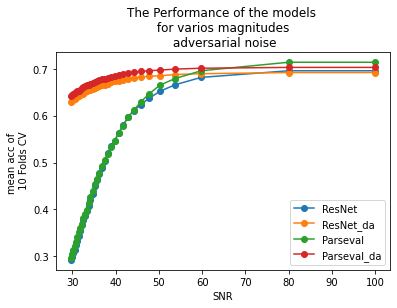

In [100]:
import matplotlib.pyplot as plt

legend = ["ResNet", "ResNet_da", "Parseval", "Parseval_da"]
plt.plot(list_df_r[0]["SNR"], mean_acc_r, 'o-')
plt.plot(list_df_r[0]["SNR"], mean_acc_da_r, 'o-')

plt.plot(list_df_r[0]["SNR"], mean_acc, 'o-')
plt.plot(list_df_r[0]["SNR"], mean_acc_da, 'o-')

plt.title("The Performance of the models \n for varios magnitudes \n adversarial noise")
plt.ylabel('mean acc of \n 10 Folds CV')
plt.xlabel('SNR')
plt.legend(legend, loc='lower right')
plt.show()

In [119]:
import json
for i in range(34):
    with open("result.json", mode='a', encoding='utf-8') as feedsjson:
        data = {"SNR":list_df_r[0]["SNR"][i], "mean_ResNet":mean_acc_r[i],"mean_ResNet_da":mean_acc_da_r[i], "mean_Parseval":mean_acc[i],"mean_Parseval_da":mean_acc_da[i]}
        feedsjson.write(json.dumps(data, ensure_ascii=False, indent=4))
        feedsjson.close()